# Importing Packages

In [146]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

# Creating Bell pair by a third party

In [175]:
def bell_state(qc, control, target):
    qc.barrier()
    qc.h(control)
    qc.cx(control, target)
    qc.barrier()

# Interaction between Alice qubit and $|k>$ state to be sent to Bob

In [176]:

def interact(qc, q1, q2):
    qc.cx(q1, q2)
    qc.h(q1)
    qc.barrier()

# Measuring Qubits 1 and 2 by Alice to collapse to$|k>$

In [177]:
def measure1(qc, q1, q2):
    qc.measure(q1, c1)
    qc.measure(q2, c2)
    qc.barrier()

# Bob reconstructs $|k>$ using information he receives from Alice

In [178]:
def bob(qc, q3, c1, c2):
    qc.x(q3).c_if(c1,1)
    qc.z(q3).c_if(c2,1)
    qc.barrier()

# Creating Quantum Circuit

In [192]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024

style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

qreg = QuantumRegister(3, name="q")    
c1 = ClassicalRegister(1, name="c1") 
c2 = ClassicalRegister(1, name="c2") 
# c3 = ClassicalRegister(1, name="c3") 
qc = QuantumCircuit(qreg, c1, c2)

# Creating $|k>$ state 

<IPython.core.display.Latex object>

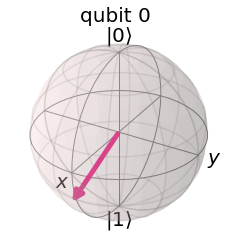

In [193]:
# Create random 1-qubit state
q1 = random_statevector(2)

init_gate = Initialize(q1)
init_gate.label = "init"
qc.append(init_gate, [0])

# Display it nicely
display(array_to_latex(q1, prefix="|k\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(q1)



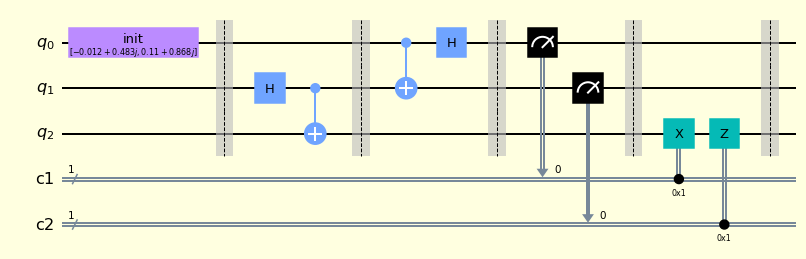

In [194]:
bell_state(qc, 1, 2)
interact(qc, 0, 1)
measure1(qc, 0, 1)
bob(qc, 2, c1, c2)
qc.draw(output="mpl", style=style)

# Verifying our protocol using "Simulated Statevector"

We can check if the initial $q0$ is same as the final $q2$

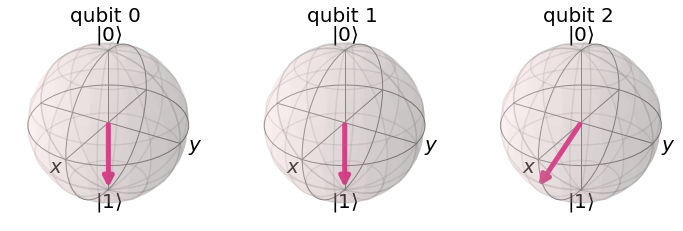

In [195]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

# Verifying using simulated counts 

Since we won't have any information about $|k>$, we cannot compare initial $q0$ and final $q2$

Every Quantum gate is reversible, so is $init\_gate$.

$init\_gate$ first sets $q0$ to $|0>$ and then to $|k>$.

Its inverse operator sets $q0$ from $|k>$ to $|0>$.

Hence, we can find if our protocol is correct if we measure the final $q2$ state as $0$.

In [196]:
inverse_init_gate = init_gate.gates_to_uncompute() # reverse of init_gate

<IPython.core.display.Latex object>

ClassicalRegister(1, 'c3')


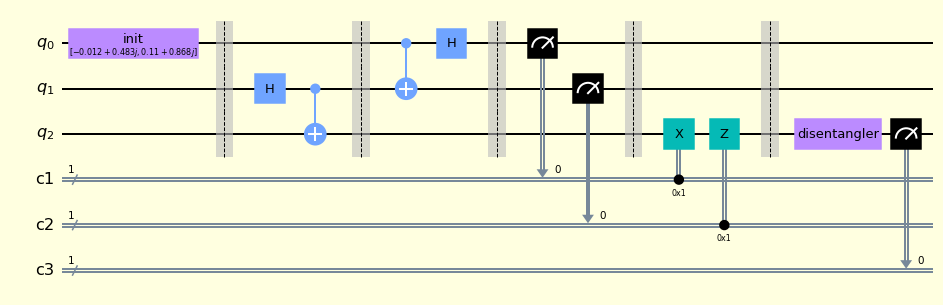

In [197]:
qreg = QuantumRegister(3, name="q")    
c1 = ClassicalRegister(1, name="c1") 
c2 = ClassicalRegister(1, name="c2") 
c3 = ClassicalRegister(1, name="c3") 
qc = QuantumCircuit(qreg, c1, c2, c3)

############################################

# Create random 1-qubit state
q1 = random_statevector(2)

qc.append(init_gate, [0])

# Display it nicely
display(array_to_latex(q1, prefix="|k\\rangle ="))
# Show it on a Bloch sphere
# plot_bloch_multivector(q1)

############################################

bell_state(qc, 1, 2)
interact(qc, 0, 1)
measure1(qc, 0, 1)
bob(qc, 2, c1, c2)

qc.append(inverse_init_gate, [2])

qc.measure(2,c3)

print(c3)

qc.draw(output="mpl", style=style)

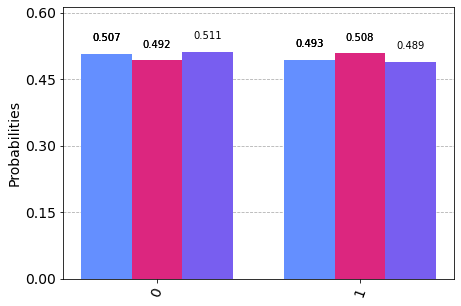

In [185]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

# References
[Random Statevector - Source Code](https://qiskit.org/documentation/_modules/qiskit/quantum_info/states/random.html#random_statevector)

[Quantum Teleportation by Qiskit](https://qiskit.org/textbook/ch-algorithms/teleportation.html#3.-Simulating-the-Teleportation-Protocol-)

[Teach me Quantum - 2018](https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_quantum_2018/intro2qc/7.Quantum%20teleportation.ipynb)

[Edwin Agnew](https://medium.com/swlh/quantum-teleportation-from-scratch-to-magic-part-2-doing-it-on-a-real-device-25be7386a158)